In [2]:
import numpy as np
import pandas as pd

# Step 1: Prepare the dataset
data = {
    'Hours Studied': [2, 3, 5, 1, 4, 6],
    'Previous Exam Score': [30, 40, 60, 20, 50, 70],
    'Result': [0, 0, 1, 0, 1, 1]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Step 2: Feature Scaling
# No feature scaling is required for this simple example.

# Step 3: Define the Perceptron
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iterations=100):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        for _ in range(self.n_iterations):
            for i in range(X.shape[0]):
                y_pred = self.predict(X[i])
                self.weights += self.learning_rate * (y[i] - y_pred) * X[i]
                self.bias += self.learning_rate * (y[i] - y_pred)

    def predict(self, X):
        return np.where(np.dot(X, self.weights) + self.bias > 0, 1, 0)

# Step 4: Train the Perceptron
X = df[['Hours Studied', 'Previous Exam Score']].values
y = df['Result'].values

perceptron = Perceptron()
perceptron.fit(X, y)

# Step 5: Evaluate the Model
y_pred = perceptron.predict(X)
accuracy = np.mean(y == y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.5


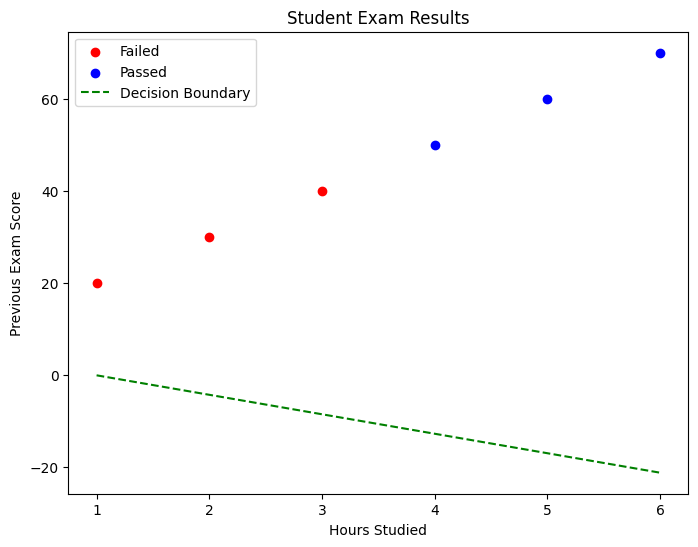

In [3]:
import matplotlib.pyplot as plt

# Scatter plot of data points
plt.figure(figsize=(8, 6))
plt.scatter(df[df['Result'] == 0]['Hours Studied'], df[df['Result'] == 0]['Previous Exam Score'], color='red', label='Failed')
plt.scatter(df[df['Result'] == 1]['Hours Studied'], df[df['Result'] == 1]['Previous Exam Score'], color='blue', label='Passed')
plt.xlabel('Hours Studied')
plt.ylabel('Previous Exam Score')
plt.title('Student Exam Results')
plt.legend()

# Plot decision boundary
x_values = np.array([np.min(X[:, 0]), np.max(X[:, 0])])
y_values = -(perceptron.weights[0] * x_values + perceptron.bias) / perceptron.weights[1]
plt.plot(x_values, y_values, color='green', linestyle='--', label='Decision Boundary')

plt.legend()
plt.show()


In [4]:
'''
    Number of Input Nodes: The number of input nodes corresponds to the number of features in the input data. In the provided dataset, each example has two input features: the number of hours studied and the previous exam score. Therefore, there are two input nodes in the perceptron network.

    Activation Function Used: The activation function used in a perceptron determines the output of the neuron based on its input. In a single-layer perceptron, the activation function is typically a step function. Common choices include the Heaviside step function, which outputs 1 if the input is greater than or equal to zero, and 0 otherwise. Mathematically, it can be represented as:
    f(x)={1,if x≥00,if x<0f(x)={1,0,​if x≥0if x<0​

    Output Node(s): In a single-layer perceptron for binary classification, there is a single output node. The output node's value represents the perceptron's decision on whether an input belongs to one class or the other. Typically, the output is binary, with 1 indicating one class (e.g., "passed") and 0 indicating the other class (e.g., "failed").

    Decision Making Process: The perceptron makes a decision based on the output node's value. If the output is closer to 1, it indicates a positive prediction (e.g., "passed"), while if it's closer to 0, it indicates a negative prediction (e.g., "failed"). The decision boundary separates the input space into regions corresponding to the predicted classes. Inputs on one side of the decision boundary are classified as one class, while inputs on the other side are classified as the other class. This decision-making process is based on the weights assigned to the input features during training. If the weighted sum of the inputs (plus a bias term) exceeds a certain threshold, the output node activates, leading to a positive prediction. Otherwise, it stays inactive, leading to a negative prediction.
'''

'\n    Number of Input Nodes: The number of input nodes corresponds to the number of features in the input data. In the provided dataset, each example has two input features: the number of hours studied and the previous exam score. Therefore, there are two input nodes in the perceptron network.\n\n    Activation Function Used: The activation function used in a perceptron determines the output of the neuron based on its input. In a single-layer perceptron, the activation function is typically a step function. Common choices include the Heaviside step function, which outputs 1 if the input is greater than or equal to zero, and 0 otherwise. Mathematically, it can be represented as:\n    f(x)={1,if x≥00,if x<0f(x)={1,0,\u200bif x≥0if x<0\u200b\n\n    Output Node(s): In a single-layer perceptron for binary classification, there is a single output node. The output node\'s value represents the perceptron\'s decision on whether an input belongs to one class or the other. Typically, the output 